Using the Open IMDb API

Huge props!

http://www.omdbapi.com/

In [1]:
import requests #making API calls
import json #bringing in data
import pandas as pd #cleaning data
import seaborn as sns #plotting
import matplotlib.pyplot as plt #plotting
%matplotlib inline

In [2]:
#given movie name, return IMDb data
def ping_imdb(m):
    print('pinging')
    m = m.replace(':', '%3A')
    url = 'http://www.omdbapi.com/?apikey=5bb59ace&t=' + m
    response = requests.get(url)
    rc = response.content
    rcj = json.loads(rc)
    
    #check to see if movie exists as titled
    if rcj['Response'] == 'True':
        return rcj
    else:
        return None

In [3]:
#given imdb data, return ratings
def get_score(d):
    ratings = d['Ratings']
    for r in ratings:
        if r['Source'] == 'Rotten Tomatoes':
            rating = r['Value'][:-1]
            return int(rating)

In [4]:
#given raw returns, return integer amount
def get_returns(d):
    try:
        returns = d['BoxOffice']
        returns = returns.replace('$', '').replace(',', '')
        return int(returns)
    except:
        return None
        #returns can be N/A or not exist

In [5]:
#given movie name, add on other bits

def fill_in(movie):

    print('starting for', movie)
    #pull movie's data from IMDb
    #not all titles are the "canonical" title, so first we guess it
    mv = ping_imdb(guess_movie(movie))

    
    if mv is not None:

        #extract Rotten Tomatos
        mv_score = get_score(mv)

        #extract box office returns
        mv_returns = get_returns(mv)
    
        return mv_score, mv_returns

    #if no data were found
    else:
        return None, None

In [8]:
fixed = {
    'X-Men 3': 'X-Men: The Last Stand'
    ,'The Mummy 3': 'The Mummy: Tomb of the Dragon Emperor'
    ,'Pineapple Exress': 'Pineapple Express'
    ,'Clashs of the Titans': 'Clash of the Titans'
    ,'Jackass 3': 'Jackass 3D'
    ,'Cowbooys & Aliens': 'Cowboys & Aliens'
    ,'Ghost Rider: Spiri 3D': 'Ghost Rider: Spirit of Vengeance'
    ,'Thor: DW': 'Thor: The Dark World'
    ,'Gardians of the Galzxy': 'Guardians of the Galaxy'
}


def guess_movie(m):
    print('guessing')
    
    #for some movies, imdb search just can't correct the titles, so I had to manually do this
    if m in fixed.keys():
        return fixed[m]
    
    #otherwise, use the search part of the API to find the movie
    url = 'http://www.omdbapi.com/?apikey=5bb59ace&s=' + m
    response = requests.get(url)
    rc = response.content
    rcj = json.loads(rc)
        
    #if can't find, return original title, it'll gracefully fail
    if rcj['Response'] == 'False':
        return m

    #if there's a result, just return the first one
    else:
        return rcj['Search'][0]['Title']

In [9]:
#pull in CSV of movies
df = pd.read_csv('Ticket Stubs.csv', dtype={'Year': int})

#loop through movies, assemble dataframe of movie, year seen, ratings, and returns

df['score'], df['return'] = zip(*df['Name'].apply(fill_in))

starting for Enchanted
guessing
pinging
starting for Pokemon
guessing
pinging
starting for The Ladykillers
guessing
pinging
starting for The Day After Tomorrow
guessing
pinging
starting for Sky Captain and the World of Tomorrow
guessing
pinging
starting for Magic of Flight
guessing
pinging
starting for Star Wars: Episode III: Revenge of the Sith
guessing
pinging
starting for War of the Worlds
guessing
pinging
starting for Zathura
guessing
pinging
starting for Fun with Dick and Jane
guessing
pinging
starting for X-Men 3
guessing
pinging
starting for Pirates of the Caribbean: Dead Man's Chest
guessing
pinging
starting for Over the Hedge
guessing
pinging
starting for Evan Almighty
guessing
pinging
starting for The Simpsons Movie
guessing
pinging
starting for Mr. Bean
guessing
pinging
starting for Kung Fu Panda
guessing
pinging
starting for Wall-E
guessing
pinging
starting for The Mummy 3
guessing
pinging
starting for Pineapple Exress
guessing
pinging
starting for Tropic Thunder
guessing
p

In [10]:
#make ready for plotting
df_plot = df.convert_objects(convert_numeric=True)

/Users/scottieb/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


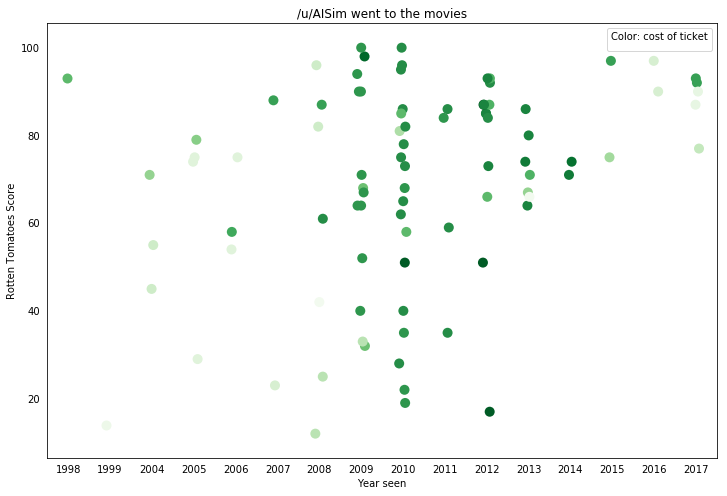

In [11]:
#plot each movie by date seen (x) vs rating (y) with color for ticket price

fig = plt.figure(figsize=(12, 8))
ax = sns.stripplot(x='Year', y='score', data=df_plot, jitter=True, hue='Price', palette='Greens', size=10)
handles, labels = ax.get_legend_handles_labels()
ax.legend([], [], title='Color: cost of ticket')
ax.set_ylabel('Rotten Tomatoes Score')
ax.set_xlabel('Year seen')
ax.tick_params(width=0)
ax.set_title('/u/AISim went to the movies')